# Kernel density estimation in ggplot2

Difference between `geom_*` and `stat_*` (https://stackoverflow.com/a/44226841) - basically there is none, everything needs to have both but the other is constructed automatically, so you just pick either one. They do the same thing. Though default parameters may differ:

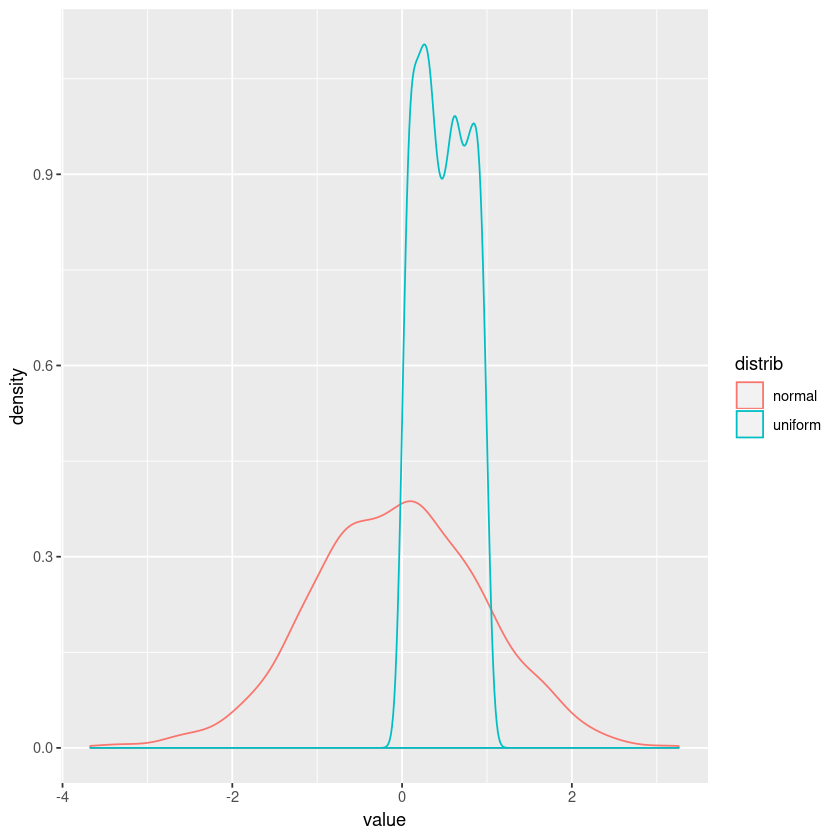

In [1]:
library(ggplot2)

n = data.frame(value=rnorm(1000), distrib="normal")
u = data.frame(value=runif(1000), distrib="uniform")
df = rbind(n, u)

# Gives lines, comparing both
print(ggplot(df, aes(x=value, colour=distrib)) + geom_density())

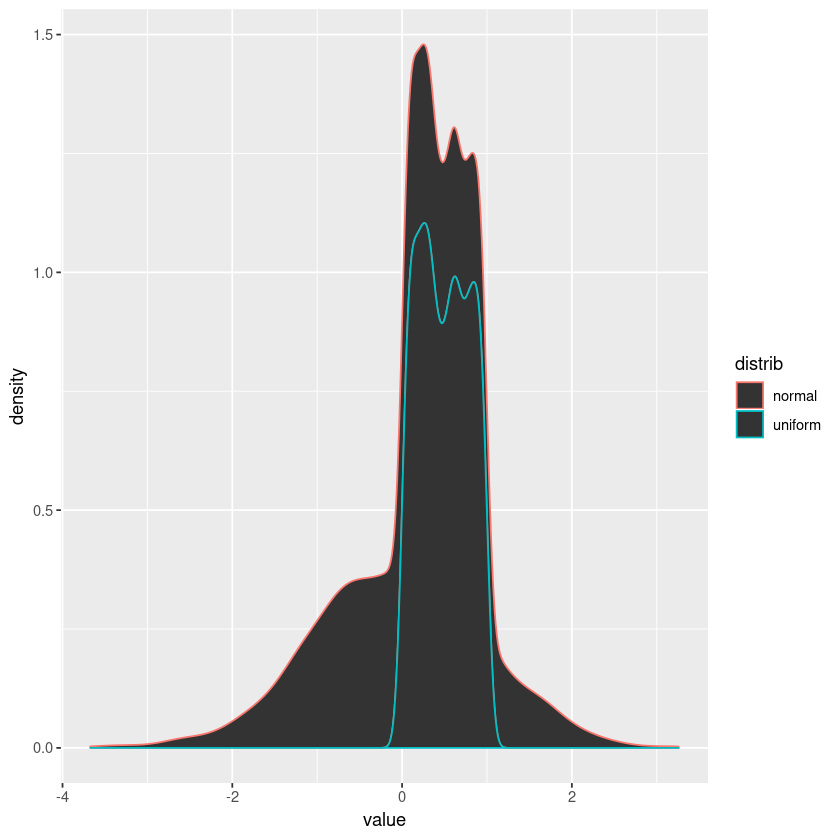

In [2]:
# Gives a stacked chart, which looks very misleading
print(ggplot(df, aes(x=value, colour=distrib)) + stat_density())

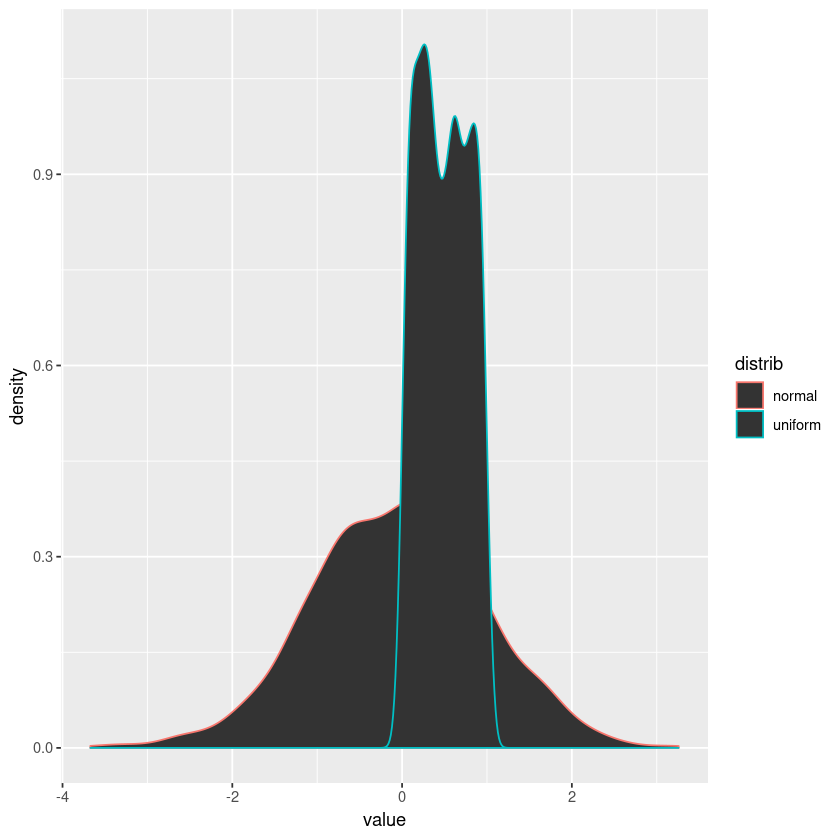

In [3]:
# Argument "position" controls whether it's stacked or not:
print(ggplot(df, aes(x=value, colour=distrib)) + stat_density(position="identity"))

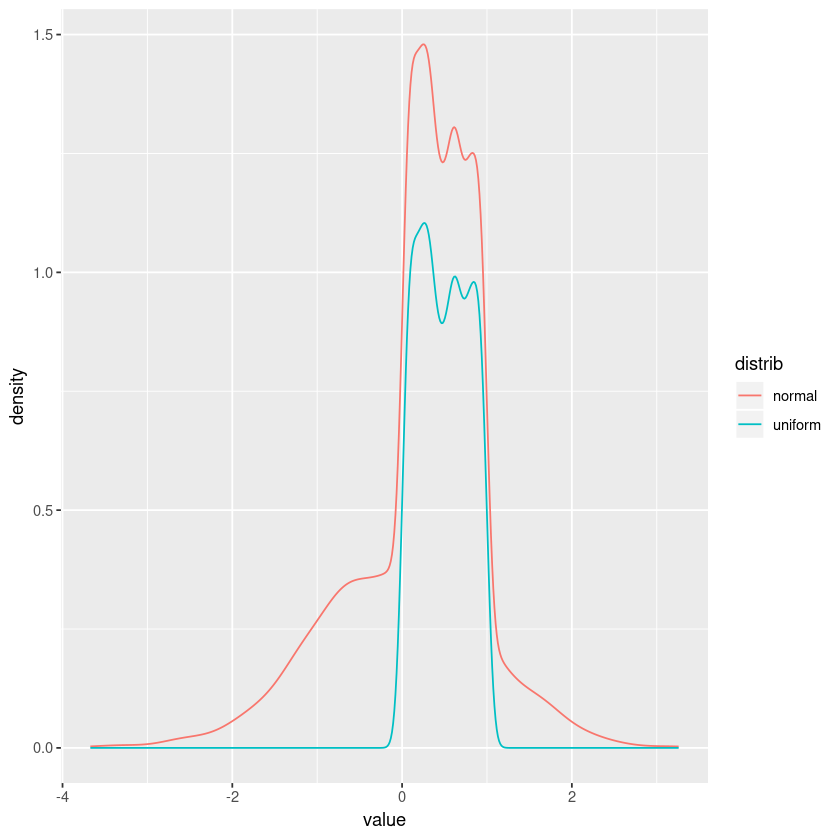

In [4]:
# And to make it lines rather than a shaded area:
print(ggplot(df, aes(x=value, colour=distrib)) + stat_density(geom="line"))

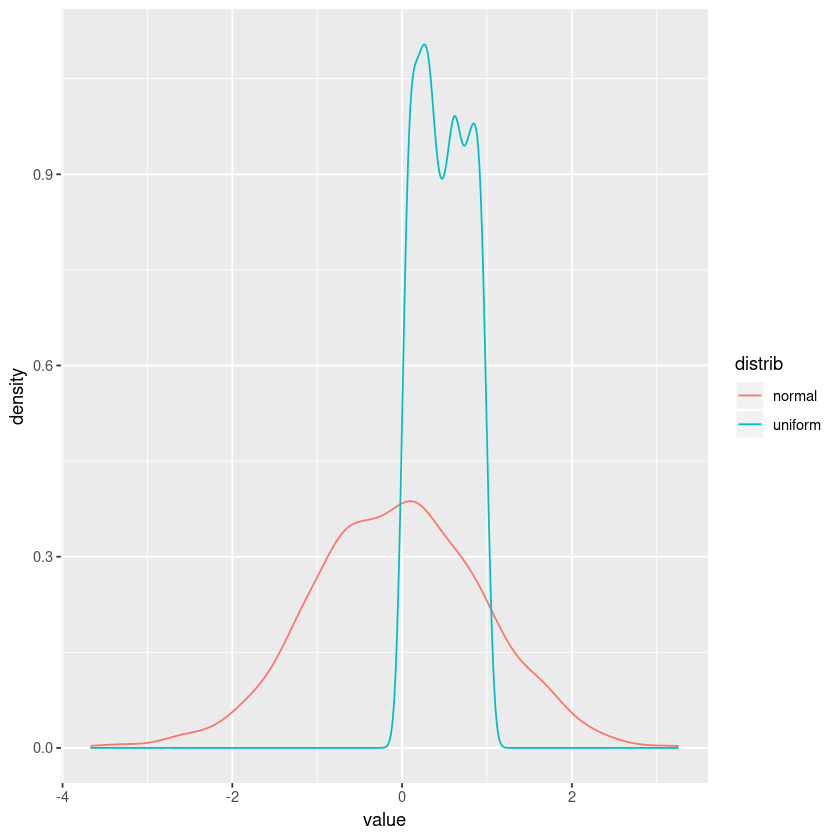

In [5]:
# Together, we get the same as geom_density():
print(ggplot(df, aes(x=value, colour=distrib)) + stat_density(geom="line", position="identity"))

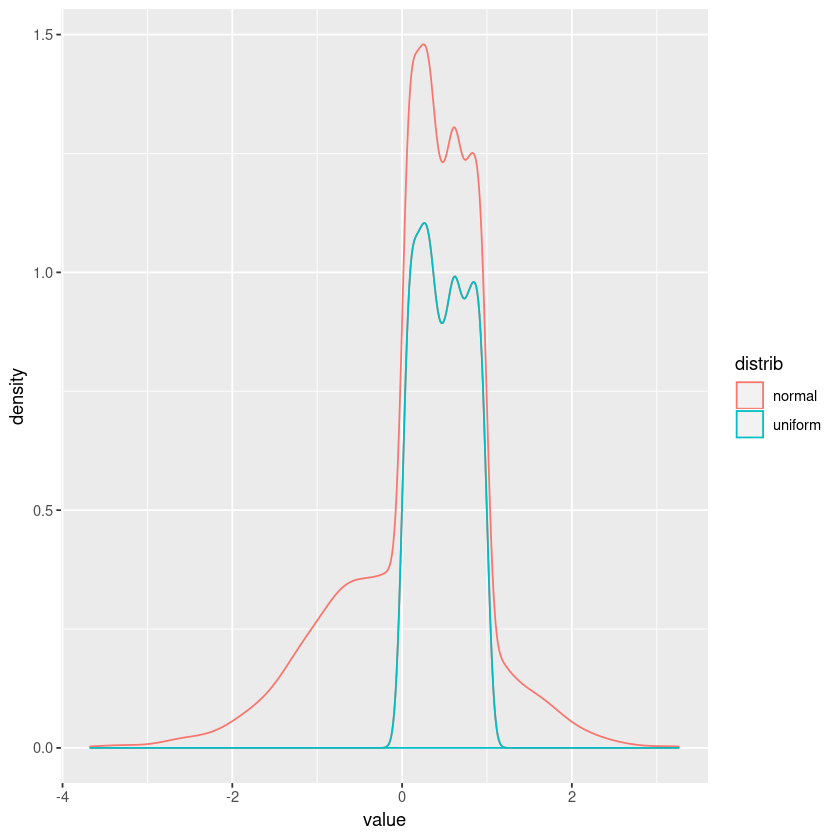

In [6]:
# Stacked with geom_density():
print(ggplot(df, aes(x=value, colour=distrib)) + geom_density(position="stack"))

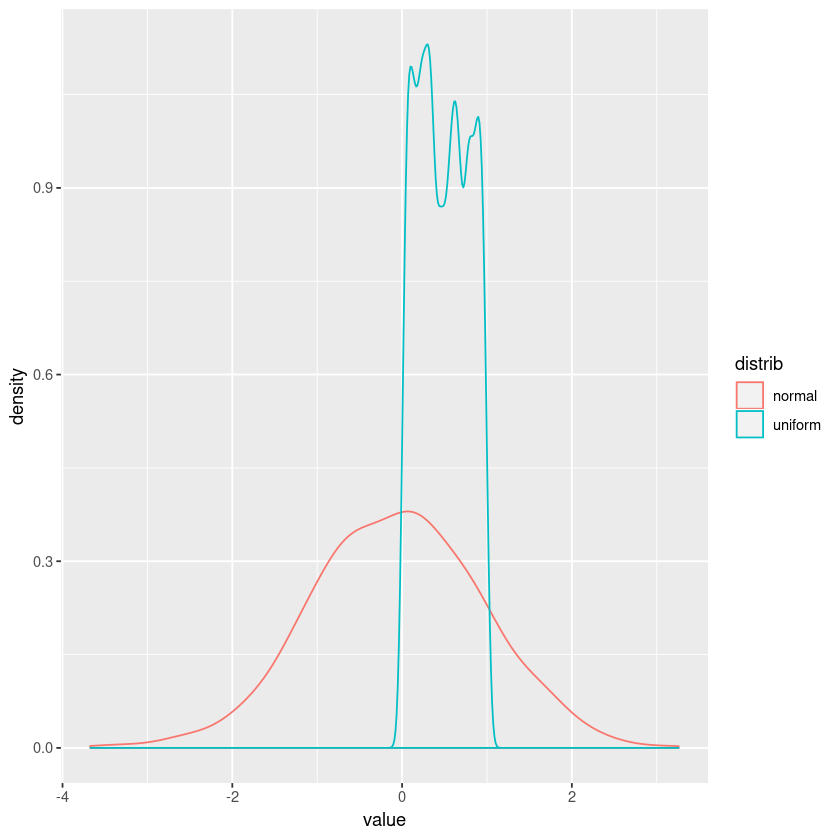

In [7]:
# This function calls density() under the hood, which performs kernel density estimation.
# You can pass any parameters to it from both geom_density() and stat_density().

# E.g. different bandwith method: ?density recommends using "SJ", but it seems not very smooth for the uniform:
print(ggplot(df, aes(x=value, colour=distrib)) + geom_density(bw="SJ"))

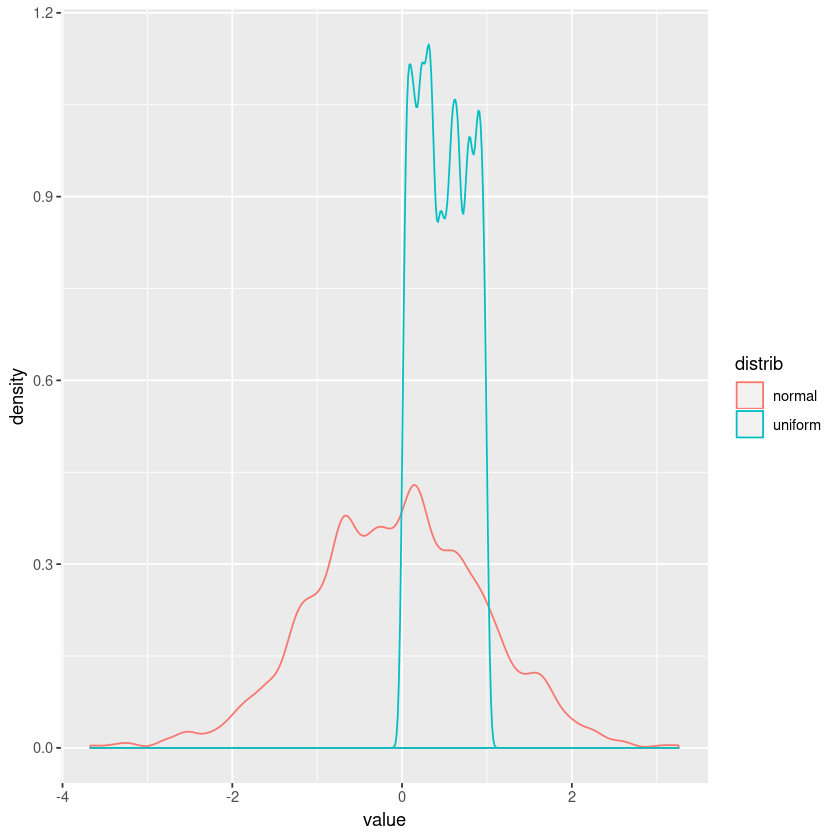

In [8]:
# Using the default bandwidth "nrd0", but with half the bandwidth:
print(ggplot(df, aes(x=value, colour=distrib)) + geom_density(adjust=0.5))

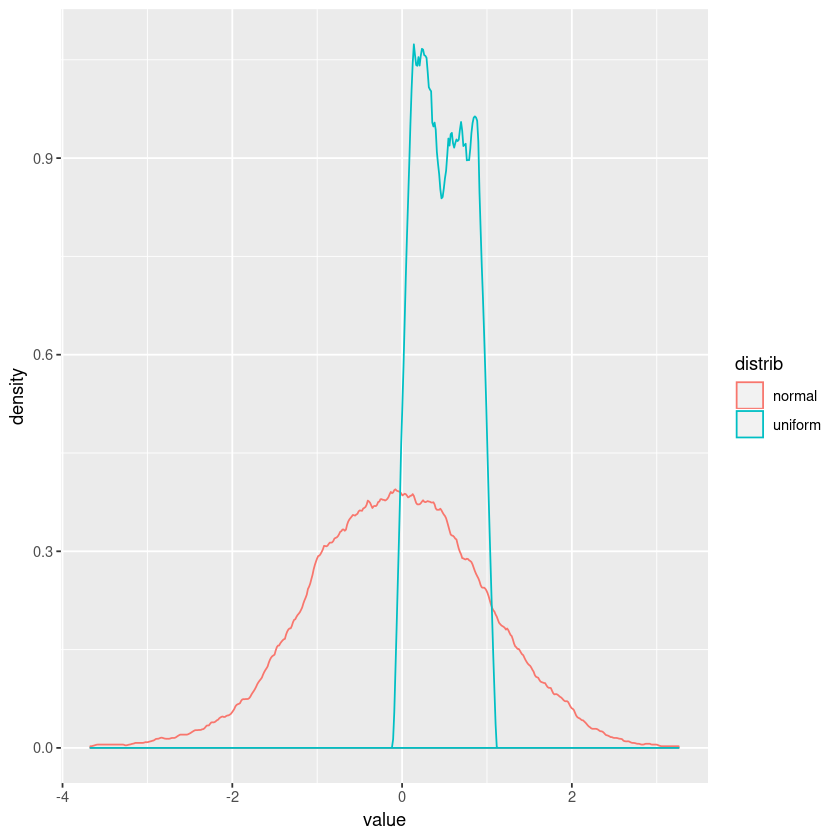

In [9]:
# Or to use a different kernel, e.g. rectangular:
print(ggplot(df, aes(x=value, colour=distrib)) + geom_density(kernel="rectangular"))

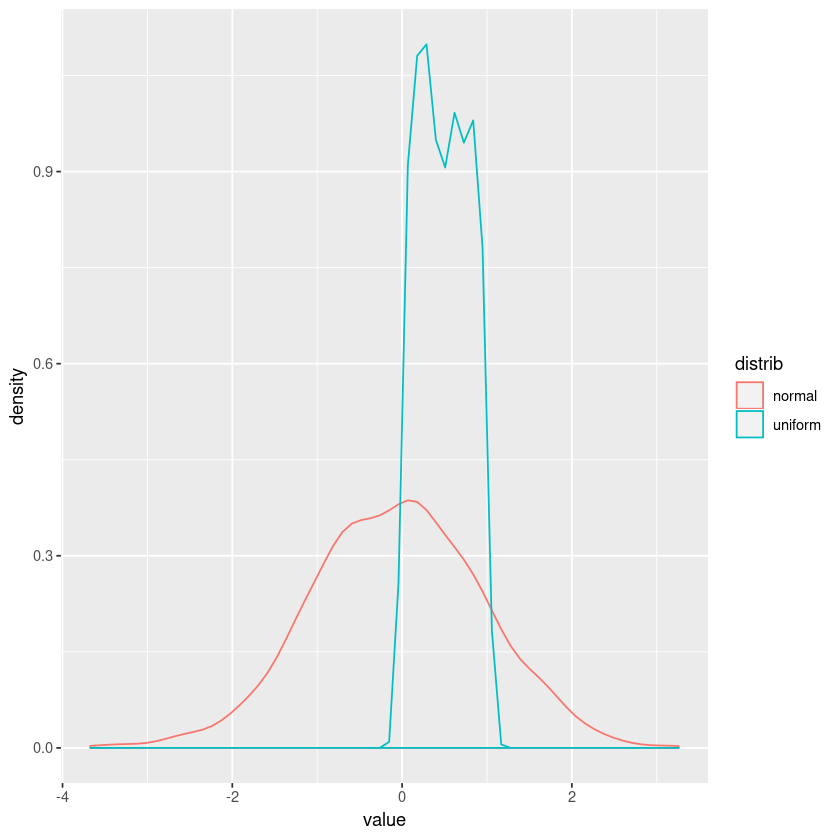

In [10]:
# Fewer points of estimation, less smooth
print(ggplot(df, aes(x=value, colour=distrib)) + geom_density(n=64))